# Collatz problem

## 関数定義

In [1]:
def collatz(num):
    if (type(num) != int) or (num <= 0):
        print('Input a positive integer')
    elif num == 1:
        return 0
    elif num % 2 == 0:
        return int(num/2)
    else:
        return num*3+1

In [2]:
num = 7
mylist = [num]

while num > 1 and len(mylist) < 1000:
    num = collatz(num)
    mylist.append(num)
else: print(mylist)

[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]


In [3]:
def collatz_list(num):
    mylist = [num]
    while num > 1:
        num = collatz(num)
        mylist.append(num)
    else: return mylist

In [4]:
mylist = collatz_list(1)
max(mylist),len(mylist)

(1, 1)

## グラフ

In [5]:
from tqdm.notebook import tqdm

N = 10**5

X = range(1, N+1)
Y = [len(collatz_list(num))-1 for num in tqdm(X)]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
dic ={0:0, 1:0}

def collatz_length(n):
    if not(n in dic.keys()):
        m = collatz(n)
        dic[n] = collatz_length(m) + 1
    return dic[n]

In [7]:
N = 10**6
X = range(2,N+1)

dic = {0:0, 1:0}
for n in tqdm(X):
     collatz_length(n)
Y = [c[1] for c in sorted(list(dic.items()))][2:N+1]; 

  0%|          | 0/999999 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

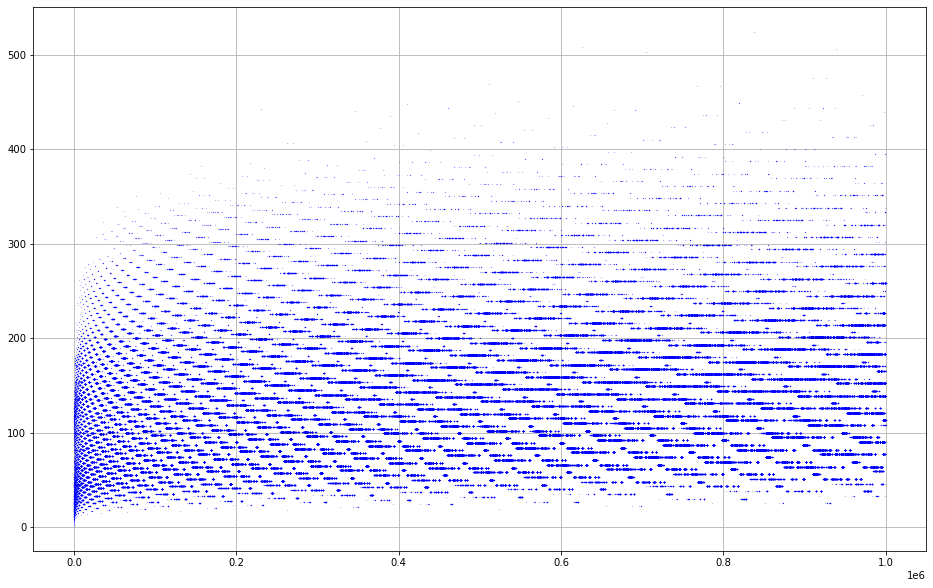

In [9]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(X,Y, 'b.', ms=0.2 )
plt.show()

## tree 表示

In [10]:
for k in range(100):
    if k%2==0 and k%3==1:
        print(collatz_list(k))

[4, 2, 1]
[10, 5, 16, 8, 4, 2, 1]
[16, 8, 4, 2, 1]
[22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[40, 20, 10, 5, 16, 8, 4, 2, 1]
[46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[64, 32, 16, 8, 4, 2, 1]
[70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[76, 38, 19, 58, 29, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
[82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2

In [11]:
class node:
    def __init__(self, val, children):
        self.val = val
        self.children = children  # List of Class node

    def display(self, chain='', indent='', shrink=True):
        # set chain and indent
        if self.val%2==0:
            chain += str(self.val) + '-'
        else:
            indent += ' '*(len(chain)-2)
            print(indent + '|')
            chain = str(self.val) + '-'
        # display chain or pass to children
        if shrink and self.val%3 == 0:
            print(indent + chain +'...')
        elif self.children == None:
            print(indent + chain)
        else:
            for c in self.children:
                c.display(chain, indent, shrink)
                
    def display_simp(self, power=0, chain='', indent='', shrink=True):
        # set chain and indent
        if self.val%2==0:
            chain += str(power) + '-'
        else:
            indent += ' '*(len(chain)-2)
            print(indent + '|')
            power = 0
            chain = '({})'.format(self.val) + '-'
        # display chain or pass to children
        if shrink and self.val%3 == 0:
            print(indent + chain.replace('-','...'))
        elif self.children == None:
            print(indent + chain)
        else:
            for c in self.children:
                power += 1
                c.display_simp(power, chain, indent, shrink)

        
def maketree(num, maxdepth):
    if (maxdepth > 0):
        children = [ maketree(2*num, maxdepth-1) ]
        if not(num in [1,4]) and (num%3 == 1 and num%6 != 1):
            children.append( maketree(int((num-1)/3), maxdepth-1))
    else:
        children = None

    rootnode = node(num, children)
    return rootnode

In [12]:
t=maketree(1, 20)
# t.display()
t.display_simp()

|
(1)-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-
                                               |
                                               (87381)...
                                         |
                                         (21845)-1-2-3-
                                                 |
                                                 (14563)-1-
                                   |
                                   (5461)-1-2-3-4-5-
                                                |
                                                (29125)-
                                            |
                                            (7281)...
                             |
                             (1365)...
                       |
                       (341)-1-2-3-4-5-6-7-8-9-
                                         |
                                         (14549)-1-
                                     |
                                     (3637)-1-2-3-


In [13]:
s = maketree(853,16)
s.display_simp()

|
(853)-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-
                                     |
                                     (4658517)...
                               |
                               (1164629)-1-2-3-
                                         |
                                         (776419)-1-
                         |
                         (291157)-1-2-3-4-5-
                                        |
                                        (1552837)-
                                    |
                                    (388209)...
                    |
                    (72789)...
                |
                (18197)-1-2-3-4-5-6-7-8-9-
                                    |
                                    (776405)-1-
                                |
                                (194101)-1-2-3-
                                           |
                                           (258801)...
                            |
                       